# Pymaceuticals Inc.
---

### Analysis

- Based on the volume of tumors at the end of the trial, the drugs Capomulin and Ramicade performed the best.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.info
#study_results.info

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_study_results["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#array(['g989'], dtype=object)

dupes = mouse_study_results.groupby(['Mouse ID', 'Timepoint'])['Mouse ID'].transform('size') > 1
duplicate_mice = mouse_study_results[dupes]

duplicate_mice
duplicate_mice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
mouse_study_results[mouse_study_results["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results.drop(mouse_study_results[mouse_study_results["Mouse ID"] == "g989"].index, inplace=True)
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_stdev = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.concat([tumor_vol_mean,
                          tumor_vol_median,
                          tumor_vol_var,
                          tumor_vol_stdev,
                          tumor_vol_sem],
                          axis=1)

summary_stats.columns = ["Mean Tumor Volume",
                         "Median Tumor Volume",
                         "Tumor Volume Variance",
                         "Tumor Volume Std. Dev.",
                         "Tumor Volume Std. Err."]
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_stats_2= mouse_study_results.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].aggregate(['mean',
                                                      'median',
                                                       'var',
                                                       'std',
                                                       'sem'])

summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
summary_stats_2.index.to_list()

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

## Bar and Pie Charts

In [10]:
import numpy as np

#Get drugs info to use for both bar charts below, sort by descending counts

drug_regimen_amounts = mouse_study_results["Drug Regimen"].value_counts().sort_values(ascending=False)
drugs = drug_regimen_amounts.index.tolist()


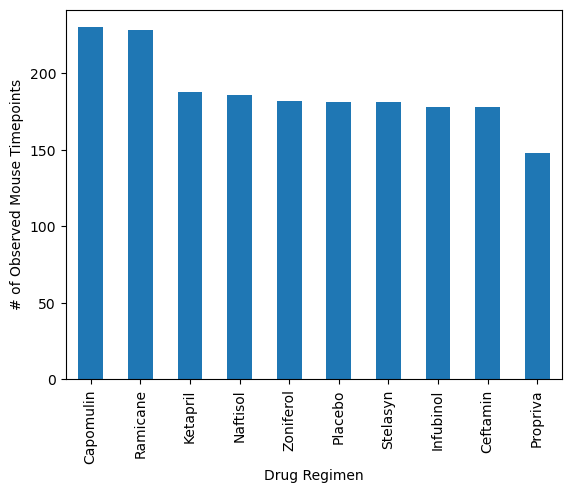

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_and_timepoints = pd.DataFrame(drug_regimen_amounts)
drug_and_timepoints.plot(kind="bar",ylabel="# of Observed Mouse Timepoints",legend=False)

plt.show()


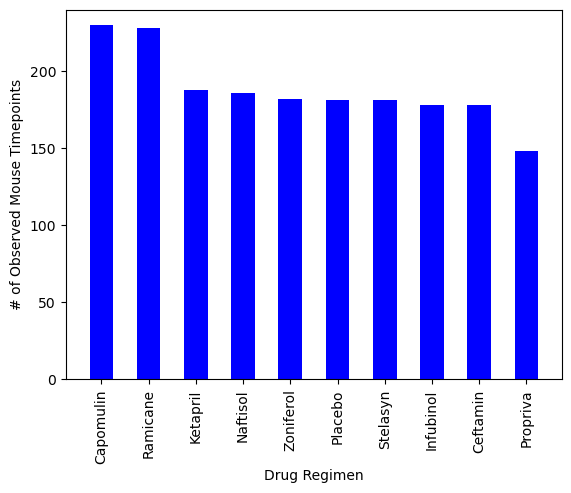

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#import numpy as np

#drugs = summary_stats_2.index.tolist()
#drug_regimen_amounts = mouse_study_results["Drug Regimen"].value_counts()
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drugs)
plt.xticks(rotation=90, ha="center")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_amounts)+10)

plt.bar(x_axis, drug_regimen_amounts, color="blue", align="center", width=.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

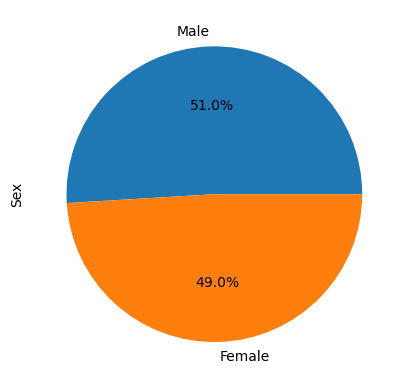

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_and_female = mouse_study_results["Sex"].value_counts().sort_values(ascending=False)

male_and_female_df = pd.DataFrame(male_and_female)
male_and_female_df.plot(kind="pie",ylabel="Sex",legend=False,autopct="%1.1f%%",subplots=True)

plt.show()

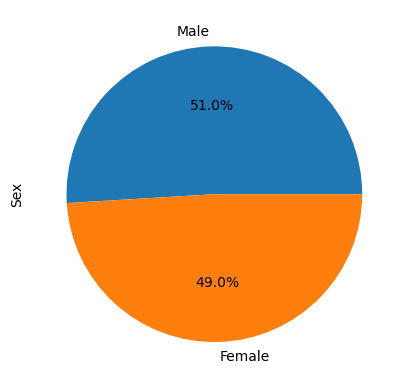

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexes = male_and_female.index.tolist()
sexes_count = male_and_female.tolist()

plt.pie(sexes_count,labels=sexes,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_drug_results = mouse_study_results[mouse_study_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#selected_drug_results.set_index(["Mouse ID"],drop=True, inplace=True)
selected_drug_results.reset_index(inplace=True, drop=True)


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(selected_drug_results.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max())
last_timepoint.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Select columns from results into timepoint dataframe
last_timepoint = pd.merge(last_timepoint, selected_drug_results[["Mouse ID","Timepoint", "Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")

last_timepoint


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = selected_drug_results["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for x in treatments:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_results = last_timepoint[(last_timepoint["Drug Regimen"]== x)]
    
    tumor_volumes.append(drug_results["Tumor Volume (mm3)"])
    quartiles = drug_results['Tumor Volume (mm3)'].quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Determine outliers using upper and lower bounds
    outliers = []
    # add subset 
    outliers.append(drug_results.loc[(drug_results['Tumor Volume (mm3)'] < lower_bound) | (drug_results['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)'])

    print(f"{x}'s potential outliers: {outliers}")


Ramicane's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Capomulin's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinol's potential outliers: [15    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftamin's potential outliers: [Series([], Name: Tumor Volume (mm3), dtype: float64)]


C:\Users\aholm\AppData\Local\Temp\ipykernel_16976\1172169586.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


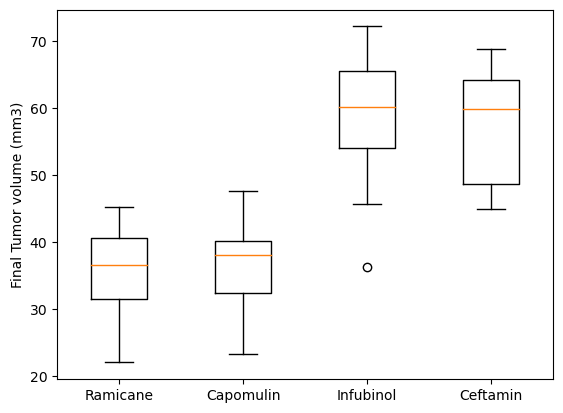

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor volume (mm3)')
ax1.boxplot(tumor_volumes)
plt.show()

## Line and Scatter Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


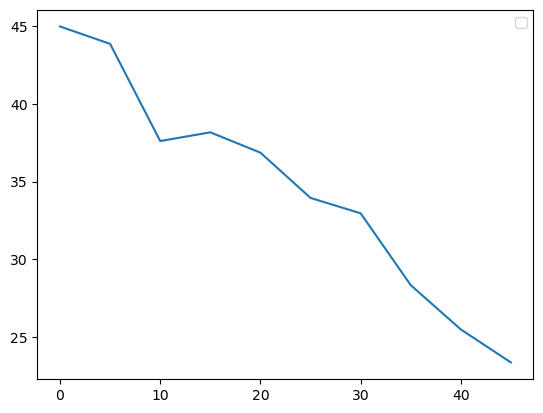

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#could not get labels to appear

#get one mouse data
mouse = selected_drug_results.loc[selected_drug_results["Drug Regimen"] == "Capomulin","Mouse ID"].values[0]
mouse_data = selected_drug_results.loc[(selected_drug_results["Drug Regimen"] == "Capomulin") & (selected_drug_results["Mouse ID"] == mouse),:]
#mouse_data

plt.xlabel = "Timepoint (days)"
plt.ylabel = "Tumor Volume (mm3)"
plt.title = f"Capomulin treatment of {mouse}"
plt.plot(mouse_data["Timepoint"],mouse_data["Tumor Volume (mm3)"])

plt.legend()
plt.show()

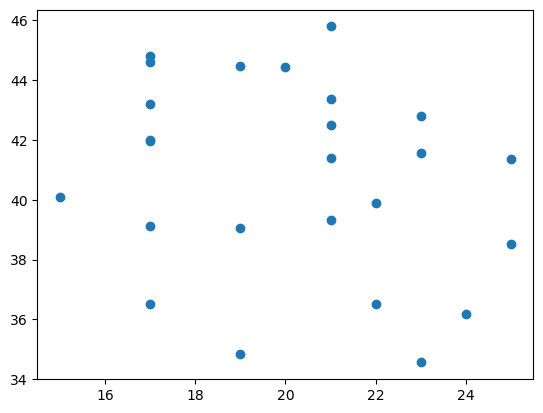

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Could not get labels to appear

mouse_weights = selected_drug_results.loc[(selected_drug_results["Drug Regimen"] == "Capomulin"),["Mouse ID","Weight (g)"]]
mouse_weights.drop_duplicates(inplace=True,keep="first")
mouse_weights.sort_index()

mouse_tumors= selected_drug_results.loc[(selected_drug_results["Drug Regimen"] == "Capomulin"),["Mouse ID","Tumor Volume (mm3)"]]
mouse_tumor_avg = mouse_tumors.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
mouse_tumor_avg.sort_index()

plt.scatter(mouse_weights["Weight (g)"],mouse_tumor_avg)

plt.xlabel = "Weight (g)"
plt.ylabel = "Average Tumor Volume (mm3)"

plt.show()

## Correlation and Regression

The correlation between both factors is -0.23


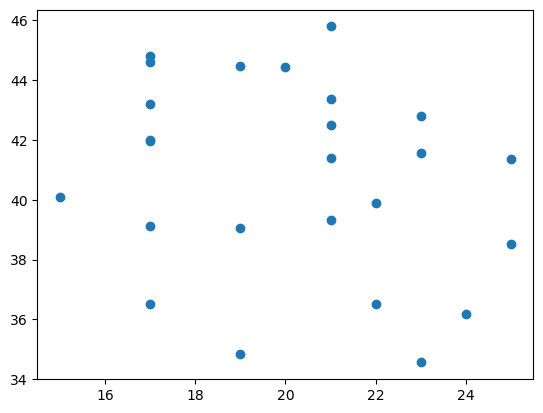

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weights["Weight (g)"],mouse_tumor_avg)
plt.scatter(mouse_weights["Weight (g)"],mouse_tumor_avg)
plt.xlabel = "Weight (g)"
plt.ylabel = "Average Tumor Volume (mm3)"
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation[0],2)}")
plt.show()